In [1]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from wordcloud import WordCloud
import string


In [2]:
import os
import random
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from torch.optim import AdamW
from transformers import BertTokenizer, BertModel, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from typing import Union, List
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
tweet_data = pd.read_csv('cyberbullying_tweets.csv')

In [6]:
tweet_data.head()

tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying

In [7]:
tweet_data['cyberbullying_type'].value_counts()

cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64

In [8]:
def extract_emojis(text):
    emojis = re.findall(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF]', text)
    return emojis

In [9]:
tweet_data['emojis'] = tweet_data['tweet_text'].apply(extract_emojis)

In [10]:
tweet_data['emojis'][21]

['😘']

In [11]:
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters, numbers, and punctuations (except for hashtags and @mentions)
    text = re.sub("[^a-zA-Z#@]", " ", text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize text
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    exclude =string.punctuation
    words = [word for word in words if word not in exclude]

    # Lemmatize words based on POS tags
    lemmatizer = WordNetLemmatizer()
    tagged_words = pos_tag(words)
    lemmatized_words = []
    for word, tag in tagged_words:
        if tag.startswith('NN'):  # Noun
            pos = 'n'
        elif tag.startswith('VB'):  # Verb
            pos = 'v'
        elif tag.startswith('JJ'):  # Adjective
            pos = 'a'
        else:
            pos = 'n'  # Default to noun
        lemmatized_words.append(lemmatizer.lemmatize(word, pos))
    text = ' '.join(lemmatized_words)
    return text



In [12]:
#!pip install --upgrade nltk


In [13]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
tweet_data['clean_text']= tweet_data['tweet_text'].apply(preprocess_text)

In [15]:
tweet_data

tweet_text cyberbullying_type  \
0      In other words #katandandre, your food was cra...  not_cyberbullying   
1      Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2      @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3      @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4      @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   
...                                                  ...                ...   
47687  Black ppl aren't expected to do anything, depe...          ethnicity   
47688  Turner did not withhold his disappointment. Tu...          ethnicity   
47689  I swear to God. This dumb nigger bitch. I have...          ethnicity   
47690  Yea fuck you RT @therealexel: IF YOURE A NIGGE...          ethnicity   
47691  Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...          ethnicity   

      emojis                                         clean_text  
0         []             word katandandre food crapilicious mkr  
1         []  aussietv white mkr theblock imacelebrityau tod...  
2         []     xochitlsuckkks classy whore red velvet cupcake  
3         []  jason gio meh p thanks head concern another an...  
4         []  rudhoeenglish isi account pretend kurdish acco...  
...      ...                                                ...  
47687     []  black ppl expect anything depend anything yet ...  
47688     []  turner withhold disappointment turner call cou...  
47689     []  swear god dumb nigger bitch get bleach hair re...  
47690     []  yea fuck rt therealexel youre nigger fuck unfo...  
47691     []  bro u get ta chill rt chillshrammy dog fuck kp...  

[47692 rows x 4 columns]

In [16]:
# import emoji

In [19]:
#!pip install demoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 622.2 kB/s eta 0:00:000:00:01


In [1]:
import demoji

demoji.download_codes()


C:\Users\hp\AppData\Local\Temp\ipykernel_6064\1306366529.py:3: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [22]:
tweet_data['emojis_description'] = tweet_data['emojis'].apply(lambda x: ' '.join(demoji.findall(' '.join(x)).values()) if x else '')

print(tweet_data['emojis_description'])

0         
1         
2         
3         
4         
        ..
47687     
47688     
47689     
47690     
47691     
Name: emojis_description, Length: 47692, dtype: object


In [23]:
tweet_data['emojis_description']= tweet_data['emojis_description'].apply(preprocess_text)

In [25]:
tweet_data['combined_text'] = tweet_data['clean_text'] + ' ' + tweet_data['emojis_description']

In [27]:
tweet_data['combined_text'][21]

'kid love mohamad bin zayed city face blow kiss'

In [28]:
from transformers import BertTokenizer, BertModel
import torch


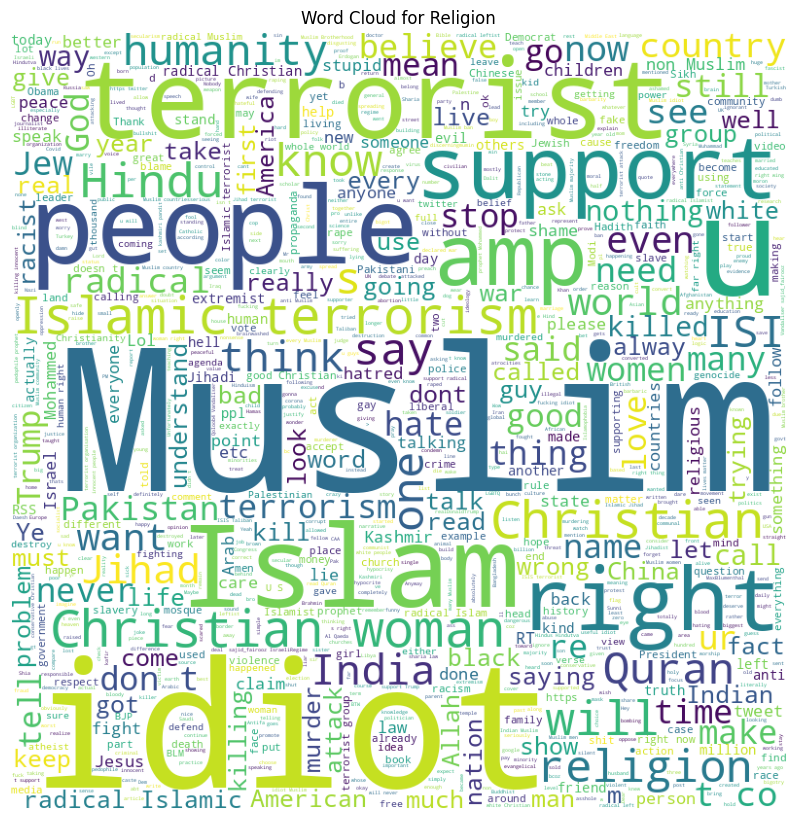

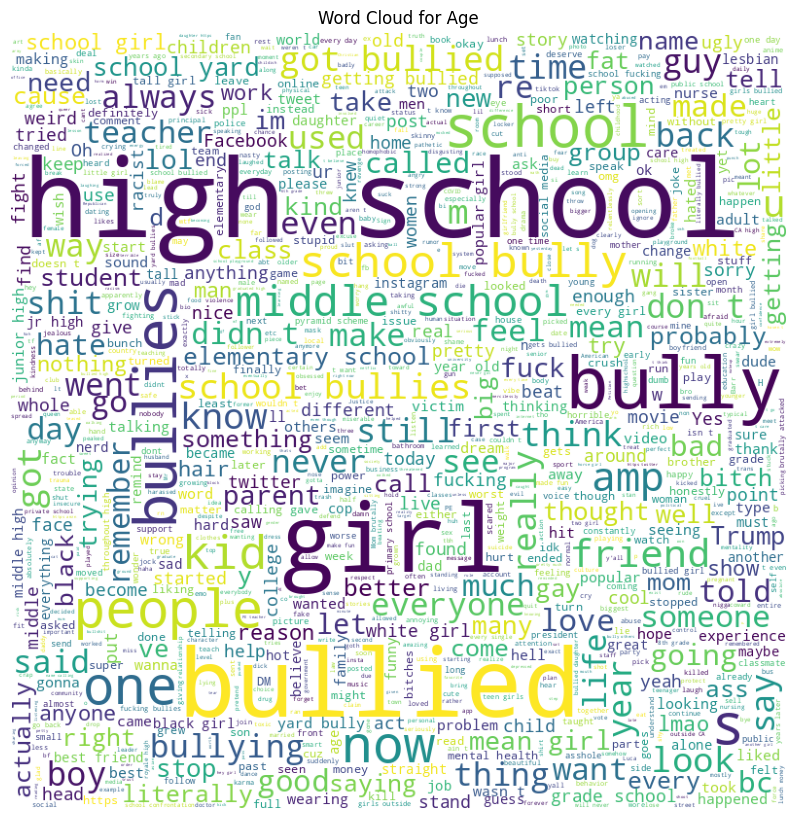

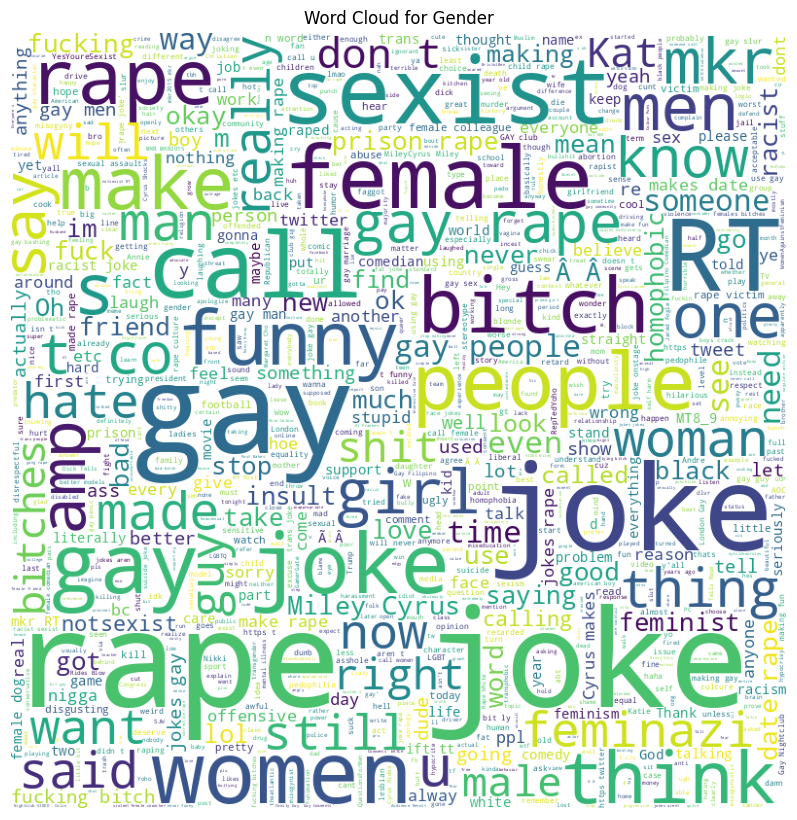

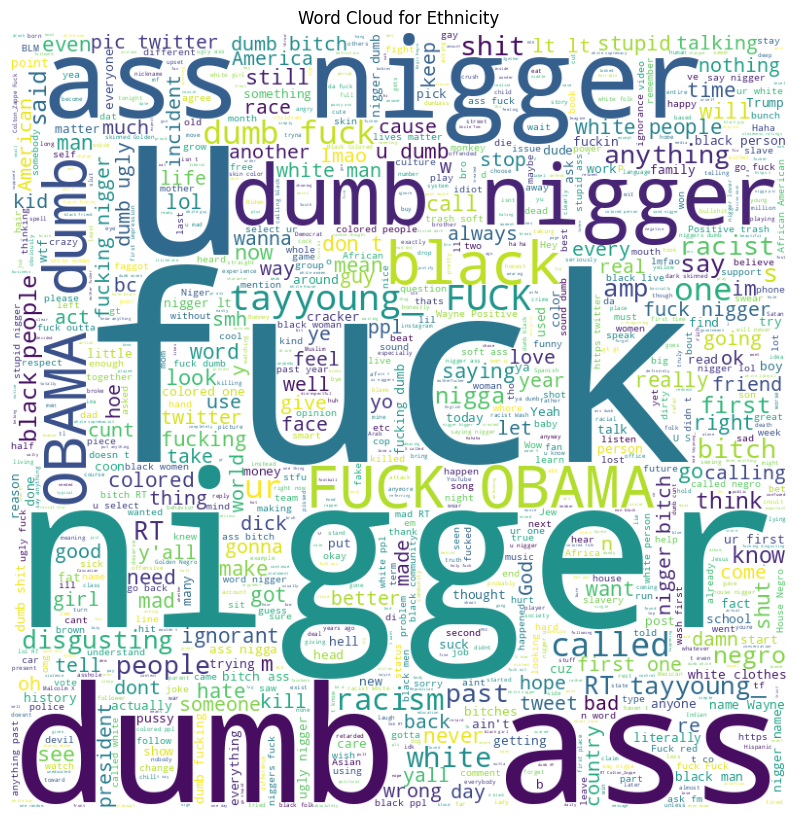

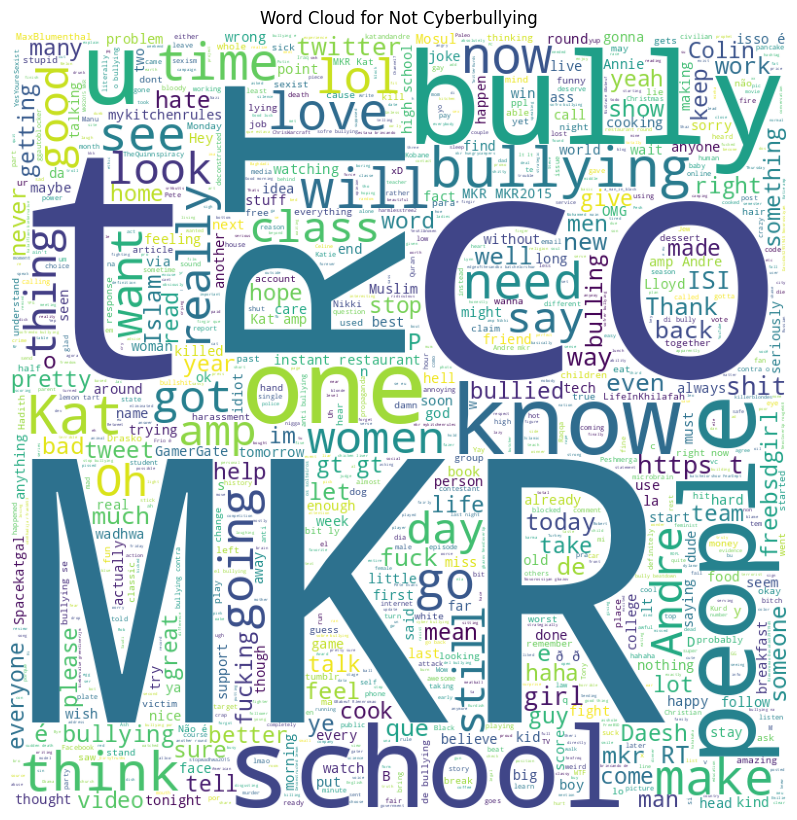

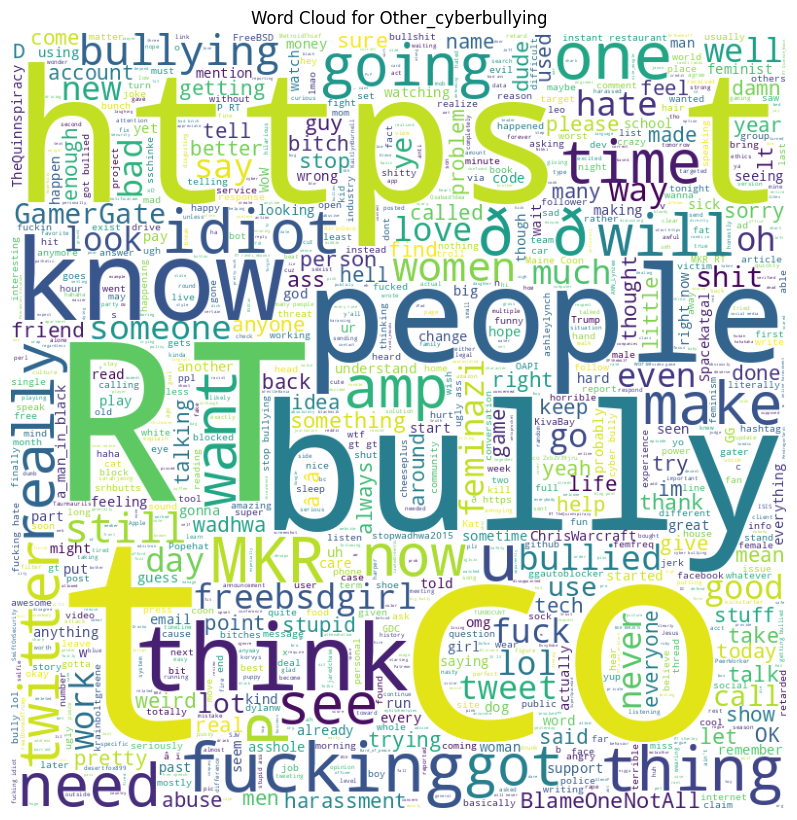

In [29]:
text_label_0 = ' '.join(tweet_data[tweet_data['cyberbullying_type'] == 'religion']['tweet_text'].values)

text_label_1 = ' '.join(tweet_data[tweet_data['cyberbullying_type'] == 'age']['tweet_text'].values)

text_label_2 = ' '.join(tweet_data[tweet_data['cyberbullying_type'] == 'gender']['tweet_text'].values)

text_label_3 = ' '.join(tweet_data[tweet_data['cyberbullying_type'] == 'ethnicity']['tweet_text'].values)

text_label_4 = ' '.join(tweet_data[tweet_data['cyberbullying_type'] == 'not_cyberbullying']['tweet_text'].values)

text_label_5 = ' '.join(tweet_data[tweet_data['cyberbullying_type'] == 'other_cyberbullying']['tweet_text'].values)

# Generate word cloud for label 0
wordcloud_label_0 = WordCloud(width=800, height=800, max_words=1000, background_color='white').generate(text_label_0)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_label_0)
plt.axis("off")
plt.title('Word Cloud for Religion')
plt.tight_layout(pad=0)
plt.show()

wordcloud_label_1 = WordCloud(width=800, height=800, max_words=1000, background_color='white').generate(text_label_1)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_label_1)
plt.axis("off")
plt.title('Word Cloud for Age')
plt.tight_layout(pad=0)
plt.show()


wordcloud_label_2 = WordCloud(width=800, height=800, max_words=1000, background_color='white').generate(text_label_2)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_label_2)
plt.axis("off")
plt.title('Word Cloud for Gender')
plt.tight_layout(pad=0)
plt.show()


wordcloud_label_3 = WordCloud(width=800, height=800, max_words=1000, background_color='white').generate(text_label_3)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_label_3)
plt.axis("off")
plt.title('Word Cloud for Ethnicity')
plt.tight_layout(pad=0)
plt.show()


wordcloud_label_4 = WordCloud(width=800, height=800, max_words=1000, background_color='white').generate(text_label_4)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_label_4)
plt.axis("off")
plt.title('Word Cloud for Not Cyberbullying')
plt.tight_layout(pad=0)
plt.show()


wordcloud_label_5 = WordCloud(width=800, height=800, max_words=1000, background_color='white').generate(text_label_5)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_label_5)
plt.axis("off")
plt.title('Word Cloud for Other_cyberbullying')
plt.tight_layout(pad=0)
plt.show()

In [30]:
print(f'There are around {int(tweet_data["combined_text"].duplicated().sum())} duplicated tweets, we will remove them.')

There are around 2367 duplicated tweets, we will remove them.


In [33]:
tweet_data.drop_duplicates("combined_text", inplace=True)

In [34]:
tweet_data['cyberbullying_type'].value_counts()

cyberbullying_type
religion               7955
age                    7886
ethnicity              7865
not_cyberbullying      7826
gender                 7704
other_cyberbullying    6089
Name: count, dtype: int64

In [36]:
tweet_data['text_len'] = [len(text.split()) for text in tweet_data.tweet_text]

In [39]:
tweet_data.sort_values(by=['text_len'], ascending=False)

tweet_text   cyberbullying_type  \
29205  is feminazi an actual word with a denot…\r\n@N...  other_cyberbullying   
24516  @NICKIMINAJ: #WutKinda\r\nAt this rate the MKR...  other_cyberbullying   
30752  I don't retreat.\r\nyessssssss http://t.co/Td9...  other_cyberbullying   
44035  You so black and white trying to live like a n...            ethnicity   
1317   @EurekAlertAAAS: Researchers push to import to...    not_cyberbullying   
...                                                  ...                  ...   
334                                                  FFS    not_cyberbullying   
8457                                     #IndiasDaughter               gender   
8165                                               good!               gender   
307                                                   :D    not_cyberbullying   
314                                            Preseason    not_cyberbullying   

             emojis                                         clean_text  \
29205           [🙉]  feminazi actual word denot nasharchy job mean ...   
24516            []  nickiminaj wutkinda rate mkr final december mk...   
30752            []  retreat yes uh make grownups boruto look lit b...   
44035            []  black white try live like nigger pahahahaha co...   
1317   [💩, 👍, 💔, 👎]  eurekalertaaas researcher push import top anti...   
...             ...                                                ...   
334              []                                                ffs   
8457             []                                     indiasdaughter   
8165             []                                               good   
307              []                                                      
314              []                                          preseason   

                      emojis_description  \
29205                   hear evil monkey   
24516                                      
30752                                      
44035                                      
1317   pile poo thumb broken heart thumb   
...                                  ...   
334                                        
8457                                       
8165                                       
307                                        
314                                        

                                           combined_text  text_len  
29205  feminazi actual word denot nasharchy job mean ...       790  
24516  nickiminaj wutkinda rate mkr final december mk...       692  
30752  retreat yes uh make grownups boruto look lit b...       505  
44035  black white try live like nigger pahahahaha co...       329  
1317   eurekalertaaas researcher push import top anti...       289  
...                                                  ...       ...  
334                                                 ffs          1  
8457                                     indiasdaughter          1  
8165                                               good          1  
307                                                              1  
314                                           preseason          1  

[45325 rows x 7 columns]

In [ ]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x='text_len', data=tweet_data[tweet_data['text_len']<=1000], palette='Blues_r')
plt.title('Count of tweets vs length ', fontsize=20)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [40]:
tweet_data = tweet_data[tweet_data['text_len'] < tweet_data['text_len'].quantile(0.995)]

In [41]:
max_len = np.max(tweet_data['text_len'])
max_len 

56

In [42]:
MAX_LEN =100

In [43]:
from keras.preprocessing.sequence import pad_sequences

2024-04-18 10:33:06.328212: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-18 10:33:06.328346: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-18 10:33:06.499978: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [45]:
label_encoder = LabelEncoder()
tweet_data['cyberbullying_type_label'] = label_encoder.fit_transform(tweet_data['cyberbullying_type'])
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


{'age': 0, 'ethnicity': 1, 'gender': 2, 'not_cyberbullying': 3, 'other_cyberbullying': 4, 'religion': 5}


/tmp/ipykernel_76/246362075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_data['cyberbullying_type_label'] = label_encoder.fit_transform(tweet_data['cyberbullying_type'])


In [46]:
X = tweet_data['combined_text'].values
y = tweet_data['cyberbullying_type_label'].values

In [136]:
class TextClassificationDataset(Dataset):

    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(text, return_tensors='pt', max_length=self.max_length, padding='max_length', truncation=True)
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label)
        }

In [138]:
class BERTClassifier(nn.Module):
    def __init__(self, bert_model_name, num_classes):
        super(BERTClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model_name)
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(self.bert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        x = self.dropout(pooled_output)
        logits = self.fc(x)
        return logits

In [150]:
from tqdm import tqdm

def train(model, data_loader, optimizer, scheduler, device):
    model.train()
    total_loss = 0
    with tqdm(total=len(data_loader), desc="Training") as progress_bar:
        for batch in data_loader:
            optimizer.zero_grad()
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            loss = nn.CrossEntropyLoss()(outputs, labels)
            loss.backward()
            optimizer.step()
            scheduler.step()
            total_loss += loss.item()
            progress_bar.update(1)
    return total_loss / len(data_loader)

In [151]:
def evaluate(model, data_loader, device):
    model.eval()
    predictions = list()
    actual = list()
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs, dim=1)
            predictions.extend(preds.cpu().tolist())
            actual.extend(labels.cpu().tolist())
    return accuracy_score(y_true=actual, y_pred=predictions), classification_report(y_true=actual, y_pred=predictions)

In [204]:
def predict_class(text, model, tokenizer,classes, max_length=128):
    model.eval()
    encoding = tokenizer(text, return_tensors='pt', max_length=max_length, padding='max_length', truncation=True)
    input_ids = encoding['input_ids']
    attention_mask = encoding['attention_mask']

    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        _, preds = torch.max(outputs, dim=1)

    return classes[preds.item()]

In [153]:
bert_model_name = 'bert-base-uncased'
num_classes = 6
max_length = 128
batch_size = 32
num_epochs = 5
learning_rate = 2e-5

In [154]:
train_texts, val_texts, train_labels, val_labels = train_test_split(X, y, test_size=0.2, random_state=42)
len(train_texts), len(val_texts), len(train_labels), len(val_labels)

(36014, 9004, 36014, 9004)

In [156]:
tokenizer = BertTokenizer.from_pretrained(bert_model_name)

train_dataset = TextClassificationDataset(train_texts, train_labels, tokenizer=tokenizer, max_length=max_length)
val_dataset = TextClassificationDataset(val_texts, val_labels, tokenizer=tokenizer, max_length=max_length)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

In [157]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BERTClassifier(bert_model_name, num_classes).to(device)

In [159]:
optimizer = AdamW(model.parameters(), lr=learning_rate)
total_steps = len(train_dataloader) * num_epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

In [160]:
for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    train(model, train_dataloader, optimizer, scheduler, device)
    accuracy, report = evaluate(model, val_dataloader, device)
    print(f"Validation Accuracy: {accuracy:.4f}")
    print(report)

Epoch 1/5



Training: 100%|██████████| 1126/1126 [12:06<00:00,  1.55it/s]


Validation Accuracy: 0.8605
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1569
           1       0.98      0.99      0.98      1554
           2       0.88      0.88      0.88      1469
           3       0.76      0.55      0.64      1635
           4       0.57      0.78      0.66      1171
           5       0.95      0.97      0.96      1606

    accuracy                           0.86      9004
   macro avg       0.86      0.86      0.85      9004
weighted avg       0.87      0.86      0.86      9004

Epoch 2/5



Training: 100%|██████████| 1126/1126 [12:06<00:00,  1.55it/s]


Validation Accuracy: 0.8683
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1569
           1       0.97      0.99      0.98      1554
           2       0.88      0.90      0.89      1469
           3       0.71      0.67      0.69      1635
           4       0.65      0.64      0.65      1171
           5       0.96      0.97      0.97      1606

    accuracy                           0.87      9004
   macro avg       0.86      0.86      0.86      9004
weighted avg       0.87      0.87      0.87      9004

Epoch 3/5



Training: 100%|██████████| 1126/1126 [12:06<00:00,  1.55it/s]


Validation Accuracy: 0.8727
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1569
           1       1.00      0.99      0.99      1554
           2       0.90      0.90      0.90      1469
           3       0.73      0.66      0.69      1635
           4       0.63      0.71      0.66      1171
           5       0.96      0.97      0.97      1606

    accuracy                           0.87      9004
   macro avg       0.86      0.87      0.87      9004
weighted avg       0.87      0.87      0.87      9004

Epoch 4/5



Training: 100%|██████████| 1126/1126 [12:06<00:00,  1.55it/s]


Validation Accuracy: 0.8731
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1569
           1       0.99      0.99      0.99      1554
           2       0.89      0.90      0.89      1469
           3       0.72      0.68      0.70      1635
           4       0.64      0.68      0.66      1171
           5       0.96      0.97      0.96      1606

    accuracy                           0.87      9004
   macro avg       0.86      0.87      0.87      9004
weighted avg       0.87      0.87      0.87      9004

Epoch 5/5



Training: 100%|██████████| 1126/1126 [12:06<00:00,  1.55it/s]


Validation Accuracy: 0.8707
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1569
           1       0.99      0.99      0.99      1554
           2       0.90      0.89      0.89      1469
           3       0.71      0.68      0.70      1635
           4       0.63      0.67      0.65      1171
           5       0.96      0.97      0.96      1606

    accuracy                           0.87      9004
   macro avg       0.86      0.86      0.86      9004
weighted avg       0.87      0.87      0.87      9004



In [206]:
torch.save(model.state_dict(), 'bert_model.pth')

# Load the model
loaded_model = BERTClassifier(bert_model_name='bert-base-uncased', num_classes=6)
loaded_model.load_state_dict(torch.load('bert_model.pth'))
loaded_model.eval()

BERTClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_af

In [207]:
load_tokenizer = BertTokenizer.from_pretrained("tokenizer_dir")

In [211]:
def predict_single_text(text, tokenizer, model):
    inputs = tokenizer(text, padding=True, truncation=True, return_tensors="pt")
    encoding = tokenizer(text, return_tensors='pt', max_length=max_length, padding='max_length', truncation=True)
    input_ids = encoding['input_ids']
    attention_mask = encoding['attention_mask']

    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        _, preds = torch.max(outputs, dim=1)

    return classes[preds.item()]

# Example usage
text = "@MelissaRyan Look at what DC Public Schools are doing for bullying LGBT students now that @m_rhee is..."
prediction = predict_single_text(text, load_tokenizer, loaded_model)
print(prediction)

not_cyberbullying


In [201]:
classes

['age',
 'ethnicity',
 'gender',
 'not_cyberbullying',
 'other_cyberbullying',
 'religion']